## Approaching categorical variables
### 类别变量
- Nominal, 无序的，男，女
- Ordinal, 有序的，低，中，高
- cyclic， 环状的，周一到周日

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold

In [11]:
df = pd.read_csv("./cat-in-the-dat-ii/train.csv")
df.head(10)

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0
5,5,0.0,NaN,1.0,T,N,Red,Triangle,Lion,China,...,05afc0f8b,2.0,Expert,Hot,b,Q,wa,3.0,4.0,0
6,6,0.0,0.0,0.0,F,N,Red,Triangle,Hamster,Costa Rica,...,4d3766412,1.0,Grandmaster,Cold,c,R,rg,5.0,6.0,0
7,7,0.0,0.0,1.0,T,N,Red,Triangle,Axolotl,Finland,...,a651dec43,3.0,Expert,Cold,b,Y,PS,1.0,1.0,0
8,8,0.0,0.0,0.0,F,N,Blue,Polygon,Hamster,Russia,...,NaN,1.0,Novice,Boiling Hot,c,N,mX,6.0,3.0,0
9,9,0.0,0.0,NaN,F,Y,Red,Polygon,Hamster,Finland,...,79b29d54c,3.0,Contributor,Lava Hot,n,I,OZ,1.0,8.0,1


In [7]:
df["target"].value_counts()

0    487677
1    112323
Name: target, dtype: int64

target 是skewed,因此指标选用AUC，ROC更适合

### Label Encoding
对每个类别用数字编码

In [8]:
df['ord_2'].unique()

array(['Hot', 'Warm', 'Freezing', 'Lava Hot', 'Cold', 'Boiling Hot', nan],
      dtype=object)

In [12]:
df['ord_2'].value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

In [9]:
mapping = {
    "Freezing": 0,
    "Warm": 1,
    "Cold": 2,
    "Boiling Hot": 3,
    "Hot": 4,
    "Lava Hot": 5
}
df.loc[:, "ord_2"] = df.ord_2.map(mapping)

/tmp/ipykernel_283945/606695737.py:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "ord_2"] = df.ord_2.map(mapping)


In [10]:
df['ord_2'].value_counts()

0.0    142726
1.0    124239
2.0     97822
3.0     84790
4.0     67508
5.0     64840
Name: ord_2, dtype: int64

使用sklearn处理label encoding.注意NAN的处理

### 注意
LabelEncoder 只能用在tree-based models: decision trees, random forest, XGBoost,GBM,lightGBM 
不能用在线性模型中例如SVM, neural networks, 因为这些模型expect data to be normalized(standardized)对于这些模型，可以binarize data

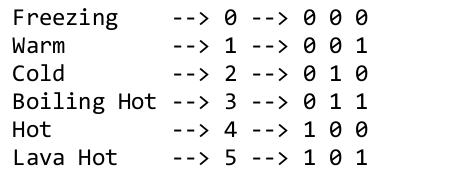

用binarized variables 还是 sparse format, sparse format 只关心有值的地方，比如上面1的位置


In [13]:
import pandas as pd
from sklearn import preprocessing
# read the data
df = pd.read_csv("./cat-in-the-dat-ii/train.csv")
# fill NaN values in ord_2 column
df.loc[:, "ord_2"] = df.ord_2.fillna("NONE")
# initialize LabelEncoder
lbl_enc = preprocessing.LabelEncoder()
# fit label encoder and transform values on ord_2 column
# P.S: do not use this directly. fit first, then transform
df.loc[:, "ord_2"] = lbl_enc.fit_transform(df.ord_2.values)

df['ord_2'].value_counts()

/tmp/ipykernel_283945/1976075718.py:11: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "ord_2"] = lbl_enc.fit_transform(df.ord_2.values)


2    142726
6    124239
1     97822
0     84790
3     67508
4     64840
5     18075
Name: ord_2, dtype: int64

### sparse representation
- 下面的数据

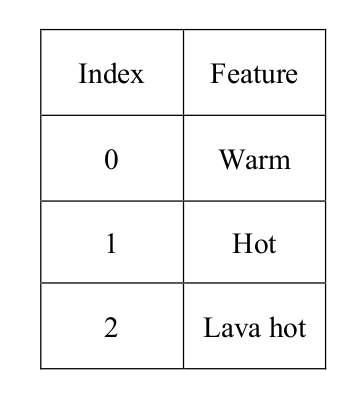

-用二进制表示后，变为3个feature

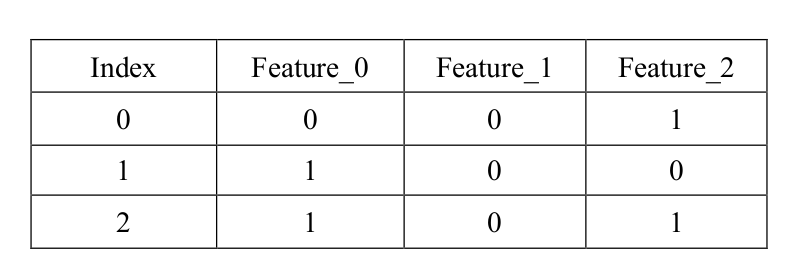

- sparse表示似乎只能减小存储空间？

In [14]:
import numpy as np
# create our example feature matrix
example = np.array(
    [
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 1]
    ]
)
# print size in bytes
print(example.nbytes)

72


In [17]:
import numpy as np
from scipy import sparse
# create our example feature matrix
example = np.array(
    [
        [0, 0, 1],
        [1, 0, 0],
        [1, 0, 1]
    ]
)
# convert numpy array to sparse CSR matrix
sparse_example = sparse.csr_matrix(example)
# print size of this sparse matrix
print(sparse_example.data.nbytes)
print(
    sparse_example.data.nbytes +
    sparse_example.indptr.nbytes +
    sparse_example.indices.nbytes
)

32
64


### one hot
- 生成一个feature数量的长向量，然后将对应位置设置成1，

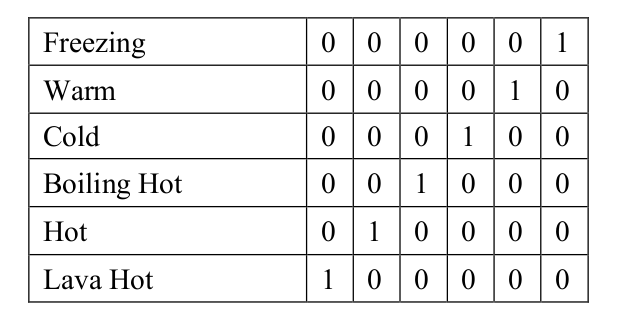

下面是onehot存储对比，8GB的数，大概只用8MB的sparse array

In [19]:
import numpy as np
from sklearn import preprocessing
# create random 1-d array with 1001 different categories (int)
example = np.random.randint(1000, size=1000000)
# initialize OneHotEncoder from scikit-learn
# keep sparse = False to get dense array
ohe = preprocessing.OneHotEncoder(sparse=False)
# fit and transform data with dense one hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1, 1))
# print size in bytes for dense array
print(f"Size of dense array: {ohe_example.nbytes}")
# initialize OneHotEncoder from scikit-learn
# keep sparse = True to get sparse array
ohe = preprocessing.OneHotEncoder(sparse=True)
# fit and transform data with sparse one-hot encoder
ohe_example = ohe.fit_transform(example.reshape(-1, 1))
# print size of this sparse matrix
print(f"Size of sparse array: {ohe_example.data.nbytes}")
full_size = (
ohe_example.data.nbytes +
ohe_example.indptr.nbytes + ohe_example.indices.nbytes
)
# print full size of this sparse matrix
print(f"Full size of sparse array: {full_size}")

/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Size of dense array: 8000000000


/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Size of sparse array: 8000000
Full size of sparse array: 16000004


In [20]:
import pandas as pd
from sklearn import preprocessing
# read the data
df = pd.read_csv("./cat-in-the-dat-ii/train.csv")

In [23]:
df.groupby(["ord_2"])["id"].count()

ord_2
Boiling Hot     84790
Cold            97822
Freezing       142726
Hot             67508
Lava Hot        64840
Warm           124239
Name: id, dtype: int64

可以用count来给categorical feature数值化

In [24]:
df.groupby(["ord_2"])["id"].transform("count")

0          67508.0
1         124239.0
2         142726.0
3          64840.0
4          97822.0
            ...   
599995    142726.0
599996     84790.0
599997    142726.0
599998    124239.0
599999     84790.0
Name: id, Length: 600000, dtype: float64

可以通过组合多行来创造新feature, 组合哪些feature？如果不考虑存储和计算成本，组合的越多越好，然后用其他方法去看哪种组合最高效

In [25]:
df["new_feature"] = (
    df.ord_1.astype(str)
    + "_"
    + df.ord_2.astype(str)
)
df.new_feature

0                 Contributor_Hot
1                Grandmaster_Warm
2                    nan_Freezing
3                 Novice_Lava Hot
4                Grandmaster_Cold
                   ...           
599995            Novice_Freezing
599996         Novice_Boiling Hot
599997       Contributor_Freezing
599998                Master_Warm
599999    Contributor_Boiling Hot
Name: new_feature, Length: 600000, dtype: object

### Whenever you get categorical variables, follow these simple steps：
- 处理NAN
- 用 LabelEncoder or mapping dictionary 处理
- create one-hot encoding现在可以忽略 binarization方法
- modeling

### NAN处理方法
- drop 不建议，丢失很多信息
- 创建一个新的类型， 如下代码

In [26]:
df.ord_2.fillna("NONE").value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
NONE            18075
Name: ord_2, dtype: int64

### 当某些类型的样本，在训练集中从来没出现过，或者训练集中非常少见，但是测试集中非常多的数据，如何处理这种情况？

- 下面的讲解没有理解

``` If you have a fixed test set, you can add your test data to training to know about the
categories in a given feature. This is very similar to semi-supervised learning in
which you use data which is not available for training to improve your model. This
will also take care of rare values that appear very less number of times in training
data but are in abundance in test data. Your model will be more robust.
Many people think that this idea overfits. It may or may not overfit. There is a
simple fix for that. If you design your cross-validation in such a way that it
replicates the prediction process when you run your model on test data, then it’s
never going to overfit. It means that the first step should be the separation of folds,
and in each fold, you should apply the same pre-processing that you want to apply
to test data. Suppose you want to concatenate training and test data, then in each
fold you must concatenate training and validation data and also make sure that your
validation dataset replicates the test set. In this specific case, you must design your
validation sets in such a way that it has categories which are “unseen” in the training
set. ``` 

In [ ]:
import pandas as pd
from sklearn import preprocessing
# read training data
train = pd.read_csv("./cat-in-the-dat-ii/train.csv")
#read test data
test = pd.read_csv("./cat-in-the-dat-ii/test.csv")
# create a fake target column for test data
# since this column doesn't exist
test.loc[:, "target"] = -1
# concatenate both training and test data
data = pd.concat([train, test]).reset_index(drop=True)
# make a list of features we are interested in
# id and target is something we should not encode
features = [x for x in train.columns if x not in ["id", "target"]]
# loop over the features list
for feat in features:
    # create a new instance of LabelEncoder for each feature
    lbl_enc = preprocessing.LabelEncoder()
    # note the trick here
    # since its categorical data, we fillna with a string
    # and we convert all the data to string type
    # so, no matter its int or float, its converted to string
    # int/float but categorical!!!
    temp_col = data[feat].fillna("NONE").astype(str).values
    # we can use fit_transform here as we do not
    # have any extra test data that we need to
    # transform on separately
    data.loc[:, feat] = lbl_enc.fit_transform(temp_col)
# split the training and test data again
train = data[data.target != -1].reset_index(drop=True)
test = data[data.target == -1].reset_index(drop=True)

上面是一种取巧的方法，通过上面的方法可以在train set里提前知道所有的类型，然后按照类型全集去变成数字，这样在测试集中，遇到没见过的类型，也可以预测。

实际使用时，不一定能提前知道测试集的全集，因此可设置一个unknown类别，用来处理这种清理

In [49]:
df = pd.read_csv("./cat-in-the-dat-ii/train.csv")

In [50]:
df.ord_4.fillna("NONE").value_counts()

N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
G        3404
V        3107
J        1950
L        1657
Name: ord_4, dtype: int64

In [48]:
df.ord_4 = df.ord_4.fillna("NONE")
df.loc[
    df["ord_4"].value_counts()[df["ord_4"]].values < 2000,
    "ord_4"
] = "RARE"

df.ord_4.value_counts()

N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
RARE     3607
G        3404
V        3107
Name: ord_4, dtype: int64

上面的代码中，将 数量少于2000的归类到RARE类中，等到了test数据集，没见过的会map到RARE中。生产中也能用。

实际的例子：标签的分布是不均匀的，因此用StratifiedKFold划分数据，数据划分时要尽量保持每一折中的数据分布差不多

In [26]:
import pandas as pd
from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
import os

def run(fold):    
    # load the full training data with folds
    df = pd.read_csv("./cat-in-the-dat-ii/train_folds.csv")
    # all columns are features except id, target and kfold columns
    features = [
        f for f in df.columns if f not in ("id", "target", "kfold")
    ]
    # fill all NaN values with NONE
    # note that I am converting all columns to "strings"
    # it doesn’t matter because all are categories
    for col in features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
    # get training data using folds
    df_train = df[df.kfold != fold].reset_index(drop=True)
    # get validation data using folds
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    # initialize OneHotEncoder from scikit-learn
    ohe = preprocessing.OneHotEncoder()
    # fit ohe on training + validation features
    full_data = pd.concat(
        [df_train[features], df_valid[features]],
        axis=0
    )
    ohe.fit(full_data[features])
    # transform training data
    x_train = ohe.transform(df_train[features])
    # transform validation data
    x_valid = ohe.transform(df_valid[features])
    # initialize Logistic Regression model
    model = linear_model.LogisticRegression()
    # 也可以用random forest，不过onehot让feature数量变得很多，因此会消耗更多的时间train，最终结果也没有多好
    # model = ensemble.RandomForestClassifier(n_jobs=-1)
    # fit model on training data (ohe)
    model.fit(x_train, df_train.target.values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)[:, 1]
    # get roc auc score
    auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
    # print auc
    print(auc)

In [27]:
run(0)

0.7868261142952667


/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
df = pd.read_csv("./cat-in-the-dat-ii/train_folds.csv")
# all columns are features except id, target and kfold columns
features = [
    f for f in df.columns if f not in ("id", "target", "kfold")
]
# fill all NaN values with NONE
# note that I am converting all columns to "strings"
# it doesn’t matter because all are categories
for col in features:
    df.loc[:, col] = df[col].astype(str).fillna("NONE")
# get training data using folds
df_train = df[df.kfold != 1].reset_index(drop=True)
# get validation data using folds
df_valid = df[df.kfold == 1].reset_index(drop=True)
# initialize OneHotEncoder from scikit-learn
ohe = preprocessing.OneHotEncoder()
# fit ohe on training + validation features
full_data = pd.concat(
    [df_train[features], df_valid[features]],
    axis=0
)

ohe.fit(full_data[features])
# transform training data
x_train = ohe.transform(df_train[features])
# transform validation data
x_valid = ohe.transform(df_valid[features])

x_train

<480000x5723 sparse matrix of type '<class 'numpy.float64'>'
	with 11040000 stored elements in Compressed Sparse Row format>

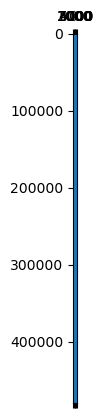

In [59]:
import matplotlib.pyplot as plt
plt.spy(x_train)
plt.show()

In [30]:
import pandas as pd
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
def run(fold):
    # load the full training data with folds
    df = pd.read_csv("./cat-in-the-dat-ii/train_folds.csv")
    # all columns are features except id, target and kfold columns
    features = [
    f for f in df.columns if f not in ("id", "target", "kfold")
    ]
    # fill all NaN values with NONE
    # note that I am converting all columns to "strings"
    # it doesnt matter because all are categories
    for col in features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
    # now its time to label encode the features
    
    # 注意和onehot的区别
    for col in features:
        lbl = preprocessing.LabelEncoder()
        # fit label encoder on all data
        lbl.fit(df[col])
        # transform all the data
        df.loc[:, col] = lbl.transform(df[col])
    # get training data using folds
    df_train = df[df.kfold != fold].reset_index(drop=True)
    # get validation data using folds
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    # 这里使用的数据需要去掉target
    # get training data
    x_train = df_train[features].values
    # get validation data
    x_valid = df_valid[features].values
    
    
    # initialize random forest model
    model = ensemble.RandomForestClassifier(n_jobs=-1)
    
    # 直接用回报错，效果不太行
    # model = linear_model.LogisticRegression()
    
    # fit model on training data (ohe)
    model.fit(x_train, df_train.target.values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)[:, 1]
    # get roc auc score
    auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
    # print auc
    print(f"Fold = {fold}, AUC = {auc}")

In [31]:
run(0)

/tmp/ipykernel_300970/664846297.py:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = lbl.transform(df[col])
/tmp/ipykernel_300970/664846297.py:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = lbl.transform(df[col])
/tmp/ipykernel_300970/664846297.py:25: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem

Fold = 0, AUC = 0.7153489290943666


### onehot 用在random forest上面，并使用SVD降维

In [32]:
import pandas as pd
from sklearn import linear_model
from sklearn import ensemble
from sklearn import metrics
from sklearn import preprocessing
from scipy import sparse
from sklearn import decomposition
import os

def run(fold):    
    # load the full training data with folds
    df = pd.read_csv("./cat-in-the-dat-ii/train_folds.csv")
    # all columns are features except id, target and kfold columns
    features = [
        f for f in df.columns if f not in ("id", "target", "kfold")
    ]
    # fill all NaN values with NONE
    # note that I am converting all columns to "strings"
    # it doesn’t matter because all are categories
    for col in features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
    # get training data using folds
    df_train = df[df.kfold != fold].reset_index(drop=True)
    # get validation data using folds
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    # initialize OneHotEncoder from scikit-learn
    ohe = preprocessing.OneHotEncoder()
    # fit ohe on training + validation features
    full_data = pd.concat(
        [df_train[features], df_valid[features]],
        axis=0
    )
    ohe.fit(full_data[features])
    # transform training data
    x_train = ohe.transform(df_train[features])
    # transform validation data
    x_valid = ohe.transform(df_valid[features])

    # initialize Truncated SVD
    # we are reducing the data to 120 components
    svd = decomposition.TruncatedSVD(n_components=120)
    # fit svd on full sparse training data
    full_sparse = sparse.vstack((x_train, x_valid))
    svd.fit(full_sparse)
    # transform sparse training data
    x_train = svd.transform(x_train)
    # transform sparse validation data
    x_valid = svd.transform(x_valid)
    
    
    # initialize Logistic Regression model
    # model = linear_model.LogisticRegression()
    # 也可以用random forest，不过onehot让feature数量变得很多，因此会消耗更多的时间train，最终结果也没有多好
    model = ensemble.RandomForestClassifier(n_jobs=-1)
    # fit model on training data (ohe)
    model.fit(x_train, df_train.target.values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)[:, 1]
    # get roc auc score
    auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
    # print auc
    print(auc)

In [33]:
run(0)

0.7060136099101519


### 继续尝试xgboost，应为是tree based 算法，因此继续使用label encoded data
- dropping certain columns which don’t add any value to the model

In [1]:
import pandas as pd
from sklearn import ensemble
from sklearn import metrics
import xgboost as xgb
from sklearn import preprocessing


def run(fold):
    # load the full training data with folds
    df = pd.read_csv("./cat-in-the-dat-ii/train_folds.csv")
    # all columns are features except id, target and kfold columns
    features = [
    f for f in df.columns if f not in ("id", "target", "kfold")
    ]
    # fill all NaN values with NONE
    # note that I am converting all columns to "strings"
    # it doesnt matter because all are categories
    for col in features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
    # now its time to label encode the features
    
    # 注意和onehot的区别
    for col in features:
        lbl = preprocessing.LabelEncoder()
        # fit label encoder on all data
        lbl.fit(df[col])
        # transform all the data
        df.loc[:, col] = lbl.transform(df[col])
    # get training data using folds
    df_train = df[df.kfold != fold].reset_index(drop=True)
    # get validation data using folds
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    # 这里使用的数据需要去掉target
    # get training data
    x_train = df_train[features].values
    # get validation data
    x_valid = df_valid[features].values
    
    
    model = xgb.XGBClassifier(
        n_jobs=-1,
        max_depth=7,
        n_estimators=200
    )
    
    # fit model on training data (ohe)
    model.fit(x_train, df_train.target.values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)[:, 1]
    # get roc auc score
    auc = metrics.roc_auc_score(df_valid.target.values, valid_preds)
    # print auc
    print(f"Fold = {fold}, AUC = {auc}")
    
    
run(0)

/tmp/ipykernel_304692/1392949215.py:28: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = lbl.transform(df[col])
/tmp/ipykernel_304692/1392949215.py:28: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = lbl.transform(df[col])
/tmp/ipykernel_304692/1392949215.py:28: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.iseti

Fold = 0, AUC = 0.7616481748915062


### 一个新的数据集
load https://archive.ics.uci.edu/ml/datasets/adult

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
adult = fetch_ucirepo(id=2) 
  
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
  
# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 
full_data = pd.concat(
    [X, y],
    axis=1
)
full_data


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

In [10]:
y.income.value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [23]:
import pandas as pd 
from sklearn import model_selection 
import os

write_relative_path = "./adult/train_folds.csv"
# read_relative_path="./adult/adult.data"
df = full_data
    
df["kfold"] = -1  # 创建一个名为 kfold 的新列，并用-1填充
df = df.sample(frac=1).reset_index(drop=True) # 打乱数据 

# fetch labels
y = df.income.values
# initiate the kfold class from model_selection module
kf = model_selection.StratifiedKFold(n_splits=5)

for fold, (trn_, val_) in enumerate(kf.split(X=df, y=y)): # 填充新的 kfold 列
    df.loc[val_, 'kfold'] = fold 

df.to_csv(write_relative_path, index=False) # 保存划分好的数据集

In [24]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,kfold
0,22,Private,137876,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,20,United-States,<=50K.,0
1,42,Private,139012,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,Taiwan,>50K,0
2,47,Private,192776,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K,0
3,43,Private,149102,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K.,0
4,38,Private,298841,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,45,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,45,Self-emp-inc,212954,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,4
48838,24,Private,218415,11th,7,Separated,Handlers-cleaners,Other-relative,White,Female,0,0,40,United-States,<=50K.,4
48839,26,Private,105787,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,36,United-States,<=50K,4
48840,25,Private,1484705,Some-college,10,Divorced,Exec-managerial,Unmarried,White,Female,0,0,25,United-States,<=50K,4


In [36]:
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

def run(fold):
    # load the full training data with folds
    df = pd.read_csv("./adult/train_folds.csv")
    # list of numerical columns
    num_cols = [
    "fnlwgt",
    "age",
    "capital-gain",
    "capital-loss",
    "hours-per-week"
    ]
    # drop numerical columns
    df = df.drop(num_cols, axis=1)
    # map targets to 0s and 1s
    target_mapping = {
        "<=50K": 0,
        "<=50K.": 0,
        ">50K.": 1,
        ">50K": 1
    }
    df.loc[:, "income"] = df.income.map(target_mapping)
    # all columns are features except income and kfold columns
    features = [
        f for f in df.columns if f not in ("kfold", "income")
    ]
    # fill all NaN values with NONE
    # note that I am converting all columns to "strings"
    # it doesnt matter because all are categories
    for col in features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
    # get training data using folds
    df_train = df[df.kfold != fold].reset_index(drop=True)
    # get validation data using folds
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    # initialize OneHotEncoder from scikit-learn
    ohe = preprocessing.OneHotEncoder()
    # fit ohe on training + validation features
    full_data = pd.concat(
        [df_train[features], df_valid[features]],
        axis=0
    )
    ohe.fit(full_data[features])
    # transform training data
    x_train = ohe.transform(df_train[features])
    # transform validation data
    x_valid = ohe.transform(df_valid[features])
    # initialize Logistic Regression model
    model = linear_model.LogisticRegression()
    # fit model on training data (ohe)
    model.fit(x_train, df_train.income.values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)[:, 1]
    # get roc auc score
    auc = metrics.roc_auc_score(df_valid.income.values, valid_preds)
    # print auc
    print(f"Fold = {fold}, AUC = {auc}")
    
run(0)

Fold = 0, AUC = 0.8760663976850497


/tmp/ipykernel_304692/1278276450.py:26: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "income"] = df.income.map(target_mapping)
/home/frog/anaconda3/envs/learning_dl/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### xgboost

In [38]:
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
import xgboost as xgb
from sklearn import preprocessing

def run(fold):
    # load the full training data with folds
    df = pd.read_csv("./adult/train_folds.csv")
    # list of numerical columns
    num_cols = [
    "fnlwgt",
    "age",
    "capital-gain",
    "capital-loss",
    "hours-per-week"
    ]
    # drop numerical columns
    df = df.drop(num_cols, axis=1)
    # map targets to 0s and 1s
    target_mapping = {
        "<=50K": 0,
        "<=50K.": 0,
        ">50K.": 1,
        ">50K": 1
    }
    df.loc[:, "income"] = df.income.map(target_mapping)
    # all columns are features except income and kfold columns
    features = [
        f for f in df.columns if f not in ("kfold", "income")
    ]
    # fill all NaN values with NONE
    # note that I am converting all columns to "strings"
    # it doesnt matter because all are categories
    for col in features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
    
    lbl = preprocessing.LabelEncoder()
    for col in features:
        lbl.fit(df[col])
        df.loc[:, col] = lbl.transform(df[col])
    
    # get training data using folds
    df_train = df[df.kfold != fold].reset_index(drop=True)
    # get validation data using folds
    df_valid = df[df.kfold == fold].reset_index(drop=True)

    # get training data
    x_train = df_train[features].values
    # get validation data
    x_valid = df_valid[features].values

    # initialize Logistic Regression model
    model = xgb.XGBClassifier(n_jobs=-1, max_depth=7, n_estimators=200)
    # fit model on training data (ohe)
    model.fit(x_train, df_train.income.values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)[:, 1]
    # get roc auc score
    auc = metrics.roc_auc_score(df_valid.income.values, valid_preds)
    # print auc
    print(f"Fold = {fold}, AUC = {auc}")
    
run(0)

/tmp/ipykernel_304692/3237051574.py:27: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "income"] = df.income.map(target_mapping)
/tmp/ipykernel_304692/3237051574.py:41: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = lbl.transform(df[col])
/tmp/ipykernel_304692/3237051574.py:41: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-uniqu

Fold = 0, AUC = 0.8640317553945688


### 加上numerical类型的feature in the xgboost model

In [39]:
import pandas as pd
from sklearn import linear_model
from sklearn import metrics
import xgboost as xgb
from sklearn import preprocessing

def run(fold):
    # load the full training data with folds
    df = pd.read_csv("./adult/train_folds.csv")
    # list of numerical columns
    num_cols = [
    "fnlwgt",
    "age",
    "capital-gain",
    "capital-loss",
    "hours-per-week"
    ]
    # drop numerical columns
    # df = df.drop(num_cols, axis=1)
    # map targets to 0s and 1s
    target_mapping = {
        "<=50K": 0,
        "<=50K.": 0,
        ">50K.": 1,
        ">50K": 1
    }
    df.loc[:, "income"] = df.income.map(target_mapping)
    # all columns are features except income and kfold columns
    features = [
        f for f in df.columns if f not in ("kfold", "income")
    ]

    # fill all NaN values with NONE
    # note that I am converting all columns to "strings"
    # it doesnt matter because all are categories
    for col in features:
        # do not encode the numerical columns
        if col not in num_cols:
            df.loc[:, col] = df[col].astype(str).fillna("NONE")
    
    # initialize LabelEncoder for each feature column
    lbl = preprocessing.LabelEncoder()
    
    # now its time to label encode the features
    for col in features:
        if col not in num_cols:

            # fit label encoder on all data
            lbl.fit(df[col])
            # transform all the data
            df.loc[:, col] = lbl.transform(df[col])
    
    # get training data using folds
    df_train = df[df.kfold != fold].reset_index(drop=True)
    # get validation data using folds
    df_valid = df[df.kfold == fold].reset_index(drop=True)

    # get training data
    x_train = df_train[features].values
    # get validation data
    x_valid = df_valid[features].values

    # initialize Logistic Regression model
    model = xgb.XGBClassifier(n_jobs=-1, max_depth=7, n_estimators=200)
    # fit model on training data (ohe)
    model.fit(x_train, df_train.income.values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)[:, 1]
    # get roc auc score
    auc = metrics.roc_auc_score(df_valid.income.values, valid_preds)
    # print auc
    print(f"Fold = {fold}, AUC = {auc}")
    
run(0)

/tmp/ipykernel_304692/4182555048.py:27: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "income"] = df.income.map(target_mapping)
/tmp/ipykernel_304692/4182555048.py:51: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = lbl.transform(df[col])
/tmp/ipykernel_304692/4182555048.py:51: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-uniqu

Fold = 0, AUC = 0.9208731737747182


### tree-based model不需要normalize data，但是linear models 例如logistics regression需要

接下来做combine一些columns

In [40]:
import itertools
import pandas as pd
import xgboost as xgb
from sklearn import metrics
from sklearn import preprocessing

def feature_engineering(df, cat_cols):
    """
    This function is used for feature engineering
    :param df: the pandas dataframe with train/test data
    :param cat_cols: list of categorical columns
    :return: dataframe with new features
    """
    # this will create all 2-combinations of values
    # in this list
    # for example:
    # list(itertools.combinations([1,2,3], 2)) will return
    # [(1, 2), (1, 3), (2, 3)]
    combi = list(itertools.combinations(cat_cols, 2))
    for c1, c2 in combi:
        df.loc[:, c1 + "_" + c2 ] = df[c1].astype(str) + "_" + df[c2].astype(str)
    return df

def run(fold):
    # load the full training data with folds
    df = pd.read_csv("./adult/train_folds.csv")
    # list of numerical columns
    num_cols = [
    "fnlwgt",
    "age",
    "capital-gain",
    "capital-loss",
    "hours-per-week"
    ]
    # drop numerical columns
    # df = df.drop(num_cols, axis=1)
    # map targets to 0s and 1s
    target_mapping = {
        "<=50K": 0,
        "<=50K.": 0,
        ">50K.": 1,
        ">50K": 1
    }
    df.loc[:, "income"] = df.income.map(target_mapping)
    
    cat_cols = [
        c for c in df.columns if c not in num_cols
        and c not in ("kfold", "income")
    ]
    
    # add new features
    df = feature_engineering(df, cat_cols)
    
    # all columns are features except income and kfold columns
    features = [
        f for f in df.columns if f not in ("kfold", "income")
    ]

    # fill all NaN values with NONE
    # note that I am converting all columns to "strings"
    # it doesnt matter because all are categories
    for col in features:
        # do not encode the numerical columns
        if col not in num_cols:
            df.loc[:, col] = df[col].astype(str).fillna("NONE")
    
    # initialize LabelEncoder for each feature column
    lbl = preprocessing.LabelEncoder()
    
    # now its time to label encode the features
    for col in features:
        if col not in num_cols:

            # fit label encoder on all data
            lbl.fit(df[col])
            # transform all the data
            df.loc[:, col] = lbl.transform(df[col])
    
    # get training data using folds
    df_train = df[df.kfold != fold].reset_index(drop=True)
    # get validation data using folds
    df_valid = df[df.kfold == fold].reset_index(drop=True)

    # get training data
    x_train = df_train[features].values
    # get validation data
    x_valid = df_valid[features].values

    # initialize Logistic Regression model
    model = xgb.XGBClassifier(n_jobs=-1, max_depth=7, n_estimators=200)
    # fit model on training data (ohe)
    model.fit(x_train, df_train.income.values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)[:, 1]
    # get roc auc score
    auc = metrics.roc_auc_score(df_valid.income.values, valid_preds)
    # print auc
    print(f"Fold = {fold}, AUC = {auc}")
    
run(0)

/tmp/ipykernel_304692/2001113626.py:44: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "income"] = df.income.map(target_mapping)
/tmp/ipykernel_304692/2001113626.py:77: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = lbl.transform(df[col])
/tmp/ipykernel_304692/2001113626.py:77: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-uniqu

Fold = 0, AUC = 0.9212403959599113


### 结果有一点提高，还可以继续做的是：创建更多feature，feature selection to select best features, 超参数的优化

Note that we have not yet used rare values, binary features, a combination of one-hot and label encoded features and several other methods


- target encoding
- 可能overfit
- 每次计算一个folder，将valid数据集加上新feature， feature的值为train集的mean，所有folder算完，刚好得到了加了新feature的数据集
- When we use target encoding, it’s better to use some kind of smoothing or adding noise in the encoded values

link: 
one-hot encoding不是万能的，这些分类变量编码方法你值得拥有 - 机器之心的文章 - 知乎
https://zhuanlan.zhihu.com/p/248763414

In [45]:
# target_encoding.py
import copy
import pandas as pd
from sklearn import metrics
from sklearn import preprocessing
import xgboost as xgb

def mean_target_encoding(data):
    # make a copy of dataframe
    df = copy.deepcopy(data)
    # list of numerical columns
    num_cols = [
        "fnlwgt",
        "age",
        "capital-gain",
        "capital-loss",
        "hours-per-week"
    ]
    # map targets to 0s and 1s
    target_mapping = {
        "<=50K": 0,
        "<=50K.": 0,
        ">50K.": 1,
        ">50K": 1
    }
    df.loc[:, "income"] = df.income.map(target_mapping)
    # all columns are features except income and kfold columns
    features = [
        f for f in df.columns if f not in ("kfold", "income") and f not in num_cols
    ]
    # fill all NaN values with NONE
    # note that I am converting all columns to "strings"
    # it doesnt matter because all are categories
    for col in features:
        # do not encode the numerical columns
        if col not in num_cols:
            df.loc[:, col] = df[col].astype(str).fillna("NONE")
    
    # now its time to label encode the features
    for col in features:
        if col not in num_cols:
            # initialize LabelEncoder for each feature column
            lbl = preprocessing.LabelEncoder()
            # fit label encoder on all data
            lbl.fit(df[col])
            # transform all the data
            df.loc[:, col] = lbl.transform(df[col])
            
    # a list to store 5 validation dataframes
    encoded_dfs = []
    
    # 每次计算一个folder，将valid数据集加上新feature， feature的值为train集的mean，所有folder算完，刚好得到了加了新feature的数据集
    # go over all folds
    for fold in range(5):
        # fetch training and validation data
        df_train = df[df.kfold != fold].reset_index(drop=True)
        df_valid = df[df.kfold == fold].reset_index(drop=True)
        # for all feature columns, i.e. categorical columns
        for column in features:
            # create dict of category:mean target
            mapping_dict = dict(
                df_train.groupby(column)["income"].mean() ## 此处是不是可以按income分布，去抽样，而不是单纯的用mean？？
            )
            # column_enc is the new column we have with mean encoding
            df_valid.loc[:, column + "_enc"] = df_valid[column].map(mapping_dict)
            # append to our list of encoded validation dataframes
            encoded_dfs.append(df_valid)
    # create full data frame again and return
    encoded_df = pd.concat(encoded_dfs, axis=0)
    return encoded_df


def run(df, fold):
    # note that folds are same as before
    # get training data using folds
    df_train = df[df.kfold != fold].reset_index(drop=True)
    # get validation data using folds
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    
    # all columns are features except income and kfold columns
    features = [
        f for f in df.columns if f not in ("kfold", "income")
    ]
    # scale training data
    x_train = df_train[features].values
    # scale validation data
    x_valid = df_valid[features].values
    # initialize xgboost model
    model = xgb.XGBClassifier(
        n_jobs=-1,
        max_depth=7
    )
    # fit model on training data (ohe)
    model.fit(x_train, df_train.income.values)
    # predict on validation data
    # we need the probability values as we are calculating AUC
    # we will use the probability of 1s
    valid_preds = model.predict_proba(x_valid)[:, 1]
    # get roc auc score
    auc = metrics.roc_auc_score(df_valid.income.values, valid_preds)
    # print auc
    print(f"Fold = {fold}, AUC = {auc}")


# read data
df = pd.read_csv("./adult/train_folds.csv")
# create mean target encoded categories and
# munge data
df = mean_target_encoding(df)
# run training and validation for 5 folds
for fold_ in range(5):
    run(df, fold_)

/tmp/ipykernel_304692/920327286.py:26: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, "income"] = df.income.map(target_mapping)
/tmp/ipykernel_304692/920327286.py:47: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, col] = lbl.transform(df[col])
/tmp/ipykernel_304692/920327286.py:47: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, 

Fold = 0, AUC = 0.9203361832767938
Fold = 1, AUC = 0.9144144377488751
Fold = 2, AUC = 0.9218967114771545
Fold = 3, AUC = 0.9204269062855088
Fold = 4, AUC = 0.92409401985357


### entity embeddings
用embedding的方式来将类型的数据转化为feature，应为onehot会导致feature数量暴增，因此考虑用embedding方式来做，

In [1]:
import os
import gc
import joblib
import pandas as pd
import numpy as np
from sklearn import metrics, preprocessing
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import callbacks
from tensorflow.keras import backend as K
from tensorflow.keras import utils

def create_model(data, catcols):
    """
    This function returns a compiled tf.keras model
    for entity embeddings
    :param data: this is a pandas dataframe
    :param catcols: list of categorical column names
    :return: compiled tf.keras model
    """
    # init list of inputs for embeddings
    inputs = []
    # init list of outputs for embeddings
    outputs = []
    # loop over all categorical columns
    for c in catcols:
        # find the number of unique values in the column
        num_unique_values = int(data[c].nunique())
        # simple dimension of embedding calculator
        # min size is half of the number of unique values
        # max size is 50. max size depends on the number of unique
        # categories too. 50 is quite sufficient most of the times
        # but if you have millions of unique values, you might need
        # a larger dimension
        embed_dim = int(min(np.ceil((num_unique_values)/2), 50))
        # simple keras input layer with size 1
        inp = layers.Input(shape=(1,))
        # add embedding layer to raw input
        # embedding size is always 1 more than unique values in input
        out = layers.Embedding(
            num_unique_values + 1, embed_dim, name=c
        )(inp)
        # 1-d spatial dropout is the standard for emebedding layers
        # you can use it in NLP tasks too
        out = layers.SpatialDropout1D(0.3)(out)
        # reshape the input to the dimension of embedding
        # this becomes our output layer for current feature
        out = layers.Reshape(target_shape=(embed_dim, ))(out)
        # add input to input list
        inputs.append(inp)
        # add output to output list
        outputs.append(out)
    # concatenate all output layers
    x = layers.Concatenate()(outputs)
    # add a batchnorm layer.
    # from here, everything is up to you
    # you can try different architectures
    # this is the architecture I like to use
    # if you have numerical features, you should add
    # them here or in concatenate layer
    x = layers.BatchNormalization()(x)
    # a bunch of dense layers with dropout.
    # start with 1 or two layers only
    x = layers.Dense(300, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(300, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    x = layers.BatchNormalization()(x)
    # using softmax and treating it as a two class problem
    # you can also use sigmoid, then you need to use only one
    # output class
    y = layers.Dense(2, activation="softmax")(x)
    # create final model
    model = Model(inputs=inputs, outputs=y)
    # compile the model
    # we use adam and binary cross entropy.
    # feel free to use something else and see how model behaves
    model.compile(loss='binary_crossentropy', optimizer='adam')
    return model
    
def run(fold):
    # load the full training data with folds
    df = pd.read_csv("./cat-in-the-dat-ii/train_folds.csv")
    # all columns are features except id, target and kfold columns
    features = [
        f for f in df.columns if f not in ("id", "target", "kfold")
    ]
    # fill all NaN values with NONE
    # note that I am converting all columns to "strings"
    # it doesnt matter because all are categories
    for col in features:
        df.loc[:, col] = df[col].astype(str).fillna("NONE")
    # encode all features with label encoder individually
    # in a live setting you need to save all label encoders
    for feat in features:
        lbl_enc = preprocessing.LabelEncoder()
        df.loc[:, feat] = lbl_enc.fit_transform(df[feat].values)
    # get training data using folds
    df_train = df[df.kfold != fold].reset_index(drop=True)
    # get validation data using folds
    df_valid = df[df.kfold == fold].reset_index(drop=True)
    # create tf.keras model
    model = create_model(df, features)
    # our features are lists of lists
    xtrain = [
        df_train[features].values[:, k] for k in range(len(features))
    ]
    xvalid = [
        df_valid[features].values[:, k] for k in range(len(features))
    ]
    # fetch target columns
    ytrain = df_train.target.values
    yvalid = df_valid.target.values
    # convert target columns to categories
    # this is just binarization
    ytrain_cat = utils.to_categorical(ytrain)
    yvalid_cat = utils.to_categorical(yvalid)
    # fit the model
    model.fit(xtrain,
        ytrain_cat,
        validation_data=(xvalid, yvalid_cat),
        verbose=1,
        batch_size=1024,
        epochs=3
    )
    # generate validation predictions
    valid_preds = model.predict(xvalid)[:, 1]
    # print roc auc score
    print(metrics.roc_auc_score(yvalid, valid_preds))
    # clear session to free up some GPU memory
    K.clear_session()
    
run(0)

2023-11-01 23:50:27.361976: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-01 23:50:27.386481: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-01 23:50:27.725405: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/tmp/ipykernel_326676/768136296.py:99: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if c

Epoch 1/3
469/469 [==============================] - 17s 32ms/step - loss: 0.4743 - val_loss: 0.4140
Epoch 2/3
469/469 [==============================] - 15s 32ms/step - loss: 0.4087 - val_loss: 0.3978
Epoch 3/3
3750/3750 [==============================] - 12s 3ms/step
0.7850974176701826


## feature engineering

日期

In [2]:
import pandas as pd
# create a series of datetime with a frequency of 10 hours
s = pd.date_range('2020-01-06', '2020-01-10', freq='10H').to_series()
# create some features based on datetime
features = {
    "dayofweek": s.dt.dayofweek.values,
    "dayofyear": s.dt.dayofyear.values,
    "hour": s.dt.hour.values,
    "is_leap_year": s.dt.is_leap_year.values,
    "quarter": s.dt.quarter.values,
    "weekofyear": s.dt.weekofyear.values
}

/tmp/ipykernel_326676/616779436.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  "weekofyear": s.dt.weekofyear.values


In [4]:
features

{'dayofweek': array([0, 0, 0, 1, 1, 2, 2, 2, 3, 3]),
 'dayofyear': array([6, 6, 6, 7, 7, 8, 8, 8, 9, 9]),
 'hour': array([ 0, 10, 20,  6, 16,  2, 12, 22,  8, 18]),
 'is_leap_year': array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True]),
 'quarter': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'weekofyear': array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])}

In [ ]:
def generate_features(df):
    # create a bunch of features using the date column
    df.loc[:, 'year'] = df['date'].dt.year
    df.loc[:, 'weekofyear'] = df['date'].dt.weekofyear
    df.loc[:, 'month'] = df['date'].dt.month
    df.loc[:, 'dayofweek'] = df['date'].dt.dayofweek
    df.loc[:, 'weekend'] = (df['date'].dt.weekday >=5).astype(int)
    # create an aggregate dictionary
    aggs = {}
    # for aggregation by month, we calculate the
    # number of unique month values and also the mean
    aggs['month'] = ['nunique', 'mean']
    aggs['weekofyear'] = ['nunique', 'mean']
    # we aggregate by num1 and calculate sum, max, min
    # and mean values of this column
    aggs['num1'] = ['sum','max','min','mean']
    # for customer_id, we calculate the total count
    aggs['customer_id'] = ['size']
    # again for customer_id, we calculate the total unique
    aggs['customer_id'] = ['nunique']
    # we group by customer_id and calculate the aggregates
    agg_df = df.groupby('customer_id').agg(aggs)
    agg_df = agg_df.reset_index()
    return agg_df

time series 时，可以在不同维度去aggregate，

In [ ]:
import numpy as np
feature_dict = {}
# calculate mean
feature_dict['mean'] = np.mean(x)
# calculate max
feature_dict['max'] = np.max(x)
# calculate min
feature_dict['min'] = np.min(x)
# calculate standard deviation
feature_dict['std'] = np.std(x)
# calculate variance
feature_dict['var'] = np.var(x)
# peak-to-peak
feature_dict['ptp'] = np.ptp(x)
# percentile features
feature_dict['percentile_10'] = np.percentile(x, 10)
feature_dict['percentile_60'] = np.percentile(x, 60)
feature_dict['percentile_90'] = np.percentile(x, 90)
# quantile features
feature_dict['quantile_5'] = np.quantile(x, 0.05)
feature_dict['quantile_95'] = np.quantile(x, 0.95)
feature_dict['quantile_99'] = np.quantile(x, 0.99)

tsfresh 是个典型的时间序列处理的包

In [1]:
from tsfresh.feature_extraction import feature_calculators as fc
# tsfresh based features
feature_dict['abs_energy'] = fc.abs_energy(x)
feature_dict['count_above_mean'] = fc.count_above_mean(x)
feature_dict['count_below_mean'] = fc.count_below_mean(x)
feature_dict['mean_abs_change'] = fc.mean_abs_change(x)
feature_dict['mean_change'] = fc.mean_change(x)

NameError: name 'x' is not defined

创建多项式feature

polynomial features. For example, a second-degree polynomial feature from two features “a” and “b” would include: “a”, “b”, “ab”, “a2” and “b2”.

In [5]:
import numpy as np
import pandas as pd
# generate a random dataframe with
# 2 columns and 100 rows
df = pd.DataFrame(
np.random.rand(100, 2),
columns=[f"f_{i}" for i in range(1, 3)]
)


df = pd.DataFrame(np.random.randint(0, 100, size=(100, 2)), columns=["f_1", "f_2"])

In [6]:
df

,f_1,f_2
0,43,13
1,51,47
2,29,52
3,87,76
4,45,98
...,...,...
95,84,75
96,92,69
97,61,52
98,58,7


In [7]:
from sklearn import preprocessing
# initialize polynomial features class object
# for two-degree polynomial features
pf = preprocessing.PolynomialFeatures(
    degree=2,
    interaction_only=False,
    include_bias=False
)
# fit to the features
pf.fit(df)
# create polynomial features
poly_feats = pf.transform(df)
# create a dataframe with all the features
num_feats = poly_feats.shape[1]
df_transformed = pd.DataFrame(
    poly_feats,
    columns=[f"f_{i}" for i in range(1, num_feats + 1)]
)

df_transformed

,f_1,f_2,f_3,f_4,f_5
0,43.0,13.0,1849.0,559.0,169.0
1,51.0,47.0,2601.0,2397.0,2209.0
2,29.0,52.0,841.0,1508.0,2704.0
3,87.0,76.0,7569.0,6612.0,5776.0
4,45.0,98.0,2025.0,4410.0,9604.0
...,...,...,...,...,...
95,84.0,75.0,7056.0,6300.0,5625.0
96,92.0,69.0,8464.0,6348.0,4761.0
97,61.0,52.0,3721.0,3172.0,2704.0
98,58.0,7.0,3364.0,406.0,49.0


f_1 * f_1 = f_3
f_2 * f_2 = f_5
f_1 * f_2 = f_4

converts the numbers to categories. It’s known as binning.
将数字转化成类型
bin类型可以和原来类型一起加进去使用

In [8]:
# create bins of the numerical columns
# 10 bins
df["f_bin_10"] = pd.cut(df["f_1"], bins=10, labels=False)
# 100 bins
df["f_bin_100"] = pd.cut(df["f_1"], bins=100, labels=False)
df

,f_1,f_2,f_bin_10,f_bin_100
0,43,13,4,43
1,51,47,5,52
2,29,52,2,29
3,87,76,8,88
4,45,98,4,45
...,...,...,...,...
95,84,75,8,85
96,92,69,9,93
97,61,52,6,62
98,58,7,5,59


log 
将巨大变化的feature，减小其变化

we would want to reduce the variance of this column, and that can be done by taking a log transformation.

注意看下面log前后的变化

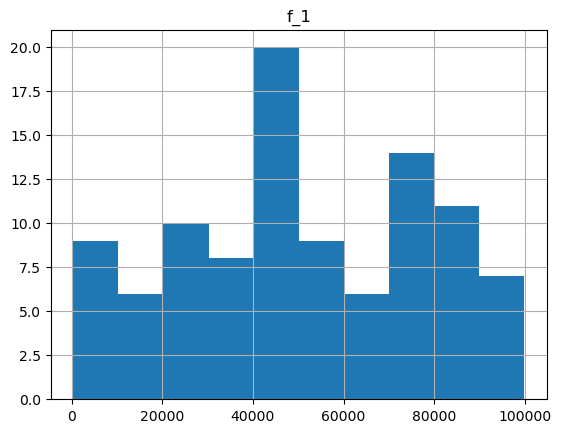

In [11]:
import matplotlib.pyplot as plt

df = pd.DataFrame(np.random.randint(0, 100000, size=(100, 1)), columns=["f_1"])
df["f_bin_100"] = pd.cut(df["f_1"], bins=10, labels=False)

# Plot a histogram of the first column
df.hist(column="f_1")

# Display the plot
plt.show()

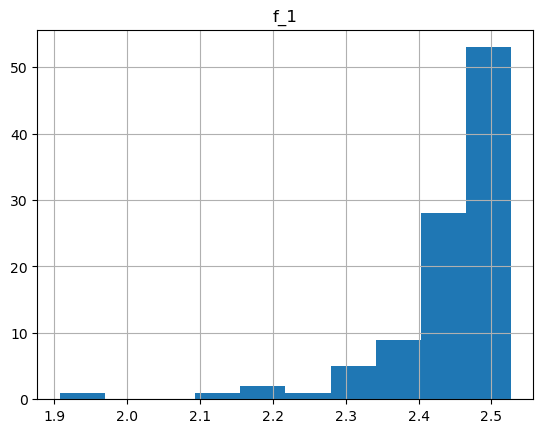

In [13]:
df["f_1"] = df["f_1"].apply(lambda x: np.log(1 + x))
# Plot a histogram of the first column
df.hist(column="f_1")

# Display the plot
plt.show()

instead of log, you can also take exponential. A very interesting case is
when you use a log-based evaluation metric, for example, RMSLE. In that case,
you can train on log-transformed targets and convert back to original using
exponential on the prediction. That would help optimize the model for the metric.

### 对于缺失值的处理
1. categorical feature， 直接当成新的一类
2. numerical， 可以用mean， median， 或者k-nn

Knn. 就是计算带缺失值的点，距离其他点的距离，找出最近的K个，然后对应位置求平均
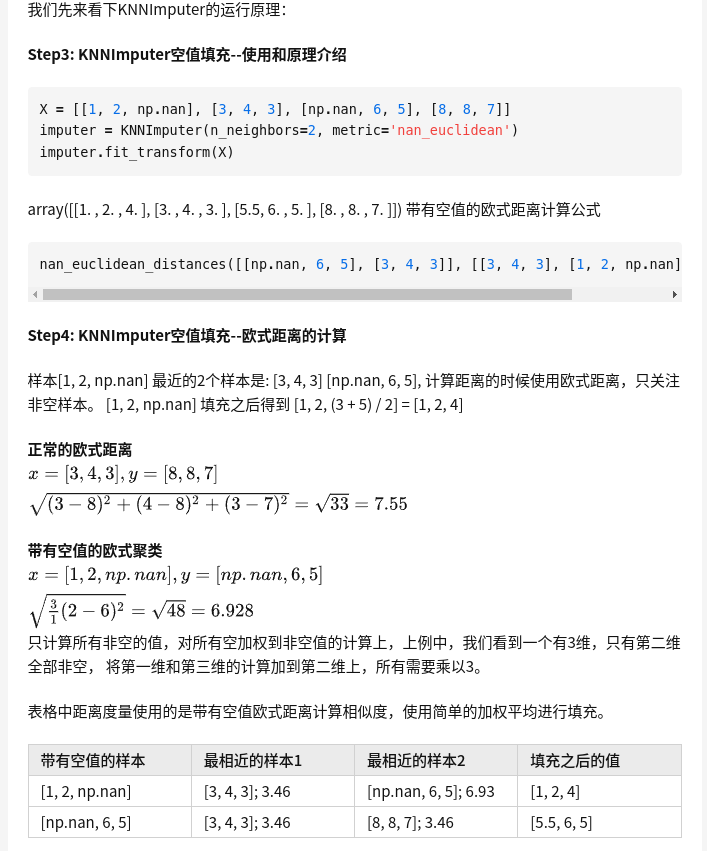

基于horse-colic数据的KNN近邻(k-nearest neighbors)预测分类 - 汀丶人工智能技术的文章 - 知乎
https://zhuanlan.zhihu.com/p/616303270

In [14]:
import numpy as np
from sklearn import impute
# create a random numpy array with 10 samples
# and 6 features and values ranging from 1 to 15
X = np.random.randint(1, 15, (10, 6))
# convert the array to float
X = X.astype(float)
# randomly assign 10 elements to NaN (missing)
X.ravel()[np.random.choice(X.size, 10, replace=False)] = np.nan
X

array([[ 2.,  6., nan, 12., nan, 13.],
       [13.,  3.,  7., 13.,  8., 12.],
       [ 8., 13., nan,  3.,  6.,  7.],
       [nan, 11., 12., 11., 11., 11.],
       [nan,  6.,  4.,  7.,  8.,  2.],
       [nan, 13.,  7., nan,  9., 13.],
       [ 7., 13., 14.,  8.,  9., 12.],
       [nan, 14.,  3.,  7., nan, 14.],
       [nan, 11.,  8.,  5.,  1., 14.],
       [14., 14., 11.,  4.,  6., 11.]])

In [16]:
# use 2 nearest neighbours to fill na values
knn_imputer = impute.KNNImputer(n_neighbors=2)
knn_imputer.fit_transform(X)

array([[ 2. ,  6. , 13. , 12. , 10. , 13. ],
       [13. ,  3. ,  7. , 13. ,  8. , 12. ],
       [ 8. , 13. , 12.5,  3. ,  6. ,  7. ],
       [ 4.5, 11. , 12. , 11. , 11. , 11. ],
       [10.5,  6. ,  4. ,  7. ,  8. ,  2. ],
       [10.5, 13. ,  7. ,  5.5,  9. , 13. ],
       [ 7. , 13. , 14. ,  8. ,  9. , 12. ],
       [11. , 14. ,  3. ,  7. ,  5. , 14. ],
       [11. , 11. ,  8. ,  5. ,  1. , 14. ],
       [14. , 14. , 11. ,  4. ,  6. , 11. ]])

In [19]:
import numpy as np
from sklearn import impute
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]

imputer = impute.KNNImputer(n_neighbors=2, metric='nan_euclidean')
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

In [21]:
# 计算带有空值的欧式距离
from sklearn.metrics.pairwise import nan_euclidean_distances
nan_euclidean_distances([[np.nan, 6, 5], [3, 4, 3]], [[3, 4, 3], [1, 2, np.nan], [8, 8, 7]])

array([[3.46410162, 6.92820323, 3.46410162],
       [0.        , 3.46410162, 7.54983444]])

Always remember that imputing values for tree-based models is unnecessary as they
can handle it themselves.

And always remember to scale or normalize your
features if you are using linear models like logistic regression or a model like SVM.
Tree-based models will always work fine without any normalization of features.

特征工程资料

https://blog.csdn.net/qq_39751437/article/details/85072251

https://zhuanlan.zhihu.com/p/480139197

### feature selection
删掉相关性太低的数据
remove features with very low variance

In [ ]:
from sklearn.feature_selection import VarianceThreshold
data = ...
var_thresh = VarianceThreshold(threshold=0.1)
transformed_data = var_thresh.fit_transform(data)
# transformed data will have all columns with variance less
# than 0.1 removed

强先关的feature也要删除，可用 Pearson correlation来选择

In [1]:
import os
os.environ['all_proxy'] = "socks5://127.0.0.1:10808"

In [2]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.datasets._base import _pkl_filepath, get_data_home


print(get_data_home())

/home/frog/scikit_learn_data


In [4]:
import numpy as np
import os
import tarfile
import joblib
from sklearn.datasets._base import _pkl_filepath, get_data_home

archive_path = "cal_housing.tgz" # change the path if it's not in the current directory
data_home = get_data_home(data_home=None) # change data_home if you are not using ~/scikit_learn_data
if not os.path.exists(data_home):
    os.makedirs(data_home)
filepath = _pkl_filepath(data_home, 'cal_housing.pkz')

with tarfile.open(mode="r:gz", name=archive_path) as f:
    cal_housing = np.loadtxt(
        f.extractfile('CaliforniaHousing/cal_housing.data'),
        delimiter=',')
    # Columns are not in the same order compared to the previous
    # URL resource on lib.stat.cmu.edu
    columns_index = [8, 7, 2, 3, 4, 5, 6, 1, 0]
    cal_housing = cal_housing[:, columns_index]

    joblib.dump(cal_housing, filepath, compress=6)

In [5]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# fetch a regression dataset
data = fetch_california_housing()
# df = pd.read_csv("./CaliforniaHousing/housing.csv")
X = data["data"]
col_names = data["feature_names"]
y = data["target"]
# convert to pandas dataframe
df = pd.DataFrame(X, columns=col_names)
# introduce a highly correlated column
df.loc[:, "MedInc_Sqrt"] = df.MedInc.apply(np.sqrt)
# get correlation matrix (pearson)
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_Sqrt
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569
MedInc_Sqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000


In [6]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile

class UnivariateFeatureSelction:
    def __init__(self, n_features, problem_type, scoring):
        """
        Custom univariate feature selection wrapper on
        different univariate feature selection models from
        scikit-learn.
        :param n_features: SelectPercentile if float else SelectKBest
        :param problem_type: classification or regression
        :param scoring: scoring function, string
        """
        # for a given problem type, there are only
        # a few valid scoring methods
        # you can extend this with your own custom
        # methods if you wish
        if problem_type == "classification":
            valid_scoring = {
                "f_classif": f_classif,
                "chi2": chi2,
                "mutual_info_classif": mutual_info_classif
            }
        else:
            valid_scoring = {
                "f_regression": f_regression,
                "mutual_info_regression": mutual_info_regression
            }
        # raise exception if we do not have a valid scoring method
        if scoring not in valid_scoring:
            raise Exception("Invalid scoring function")
        # if n_features is int, we use selectkbest
        # if n_features is float, we use selectpercentile
        # please note that it is int in both cases in sklearn
        if isinstance(n_features, int):
            self.selection = SelectKBest(
                valid_scoring[scoring],
                k=n_features)
        elif isinstance(n_features, float):
            self.selection = SelectPercentile(
                valid_scoring[scoring],
                percentile=int(n_features * 100)
            )
        else:
            raise Exception("Invalid type of feature")
    
    # same fit function
    def fit(self, X, y):
        return self.selection.fit(X, y)
    
    # same transform function
    def transform(self, X):
        return self.selection.transform(X)
    
    # same fit_transform function
    def fit_transform(self, X, y):
        return self.selection.fit_transform(X, y)
    

ufs = UnivariateFeatureSelction(
    n_features=0.1,
    problem_type="regression",
    scoring="f_regression"
)
ufs.fit(X, y)
X_transformed = ufs.transform(X)

In [7]:
X_transformed

array([[8.3252],
       [8.3014],
       [7.2574],
       ...,
       [1.7   ],
       [1.8672],
       [2.3886]])

### greedy feature selection

In [13]:
from sklearn.datasets import make_classification
# generate binary classification data
X, y = make_classification(n_samples=1000, n_features=100)

In [22]:
import pandas as pd
from sklearn import linear_model
from sklearn import metrics

class GreedyFeatureSelection:
    """
    A simple and custom class for greedy feature selection.
    You will need to modify it quite a bit to make it suitable
    for your dataset.
    """
    def evaluate_score(self, X, y):
        """
        This function evaluates model on data and returns
        Area Under ROC Curve (AUC)
        NOTE: We fit the data and calculate AUC on same data.
        WE ARE OVERFITTING HERE.
        But this is also a way to achieve greedy selection.
        k-fold will take k times longer.
        If you want to implement it in really correct way,
        calculate OOF AUC and return mean AUC over k folds.
        This requires only a few lines of change and has been
        shown a few times in this book.
        :param X: training data
        :param y: targets
        :return: overfitted area under the roc curve
        """
        # fit the logistic regression model,
        # and calculate AUC on same data
        # again: BEWARE
        # you can choose any model that suits your data
        model = linear_model.LogisticRegression()
        model.fit(X, y)
        predictions = model.predict_proba(X)[:, 1]
        auc = metrics.roc_auc_score(y, predictions)
        return auc
    def _feature_selection(self, X, y):
        """
        This function does the actual greedy selection
        :param X: data, numpy array
        :param y: targets, numpy array
        :return: (best scores, best features)
        """
        # initialize good features list
        # and best scores to keep track of both
        good_features = []
        best_scores = []
        # calculate the number of features
        num_features = X.shape[1]
        # infinite loop
        while True:
            # initialize best feature and score of this loop
            this_feature = None
            best_score = 0
            # loop over all features
            for feature in range(num_features):
                # if feature is already in good features,
                # skip this for loop
                if feature in good_features:
                    continue
                # selected features are all good features till now
                # and current feature
                selected_features = good_features + [feature]
                # remove all other features from data
                xtrain = X[:, selected_features]
                # calculate the score, in our case, AUC
                score = self.evaluate_score(xtrain, y)
                # if score is greater than the best score
                # of this loop, change best score and best feature
                if score > best_score:
                    this_feature = feature
                    best_score = score
            # if we have selected a feature, add it
            # to the good feature list and update best scores list
            if this_feature != None:
                good_features.append(this_feature)
                best_scores.append(best_score)
            # if we didnt improve during the previous round,
            # exit the while loop
            if len(best_scores) > 2:
                if best_scores[-1] < best_scores[-2]:
                    print("breeak")
                    break
        # return best scores and good features
        # why do we remove the last data point?
        return best_scores[:-1], good_features[:-1]
    
    def __call__(self, X, y):
        """
        Call function will call the class on a set of arguments
        """
        # select features, return scores and selected indices
        scores, features = self._feature_selection(X, y)
        # transform data with selected features
        return X[:, features], scores


# transform data by greedy feature selection
X_transformed, scores = GreedyFeatureSelection()(X, y)

breeak


In [23]:
scores

[0.9813661366136613,
 0.9853265326532654,
 0.9862266226622664,
 0.9869986998699869,
 0.9875387538753876,
 0.9880668066806679,
 0.9883988398839884,
 0.9886868686868687,
 0.9889908990899089,
 0.9891709170917091,
 0.9892789278927894,
 0.9894269426942693,
 0.9896389638963896,
 0.9898189818981898,
 0.98991899189919,
 0.99011101110111,
 0.9902270227022704,
 0.9903550355035503,
 0.9905590559055906,
 0.9907110711071107,
 0.9908510851085108,
 0.9909830983098311,
 0.9911591159115911,
 0.9913351335133513,
 0.9914471447144715,
 0.9915431543154316,
 0.9916191619161917,
 0.9917471747174718,
 0.9918791879187919,
 0.9919471947194719,
 0.9920752075207521,
 0.9921712171217123,
 0.9922512251225123,
 0.9924192419241924,
 0.9924832483248325,
 0.9926552655265527,
 0.9927152715271528,
 0.9927752775277527,
 0.9928312831283128,
 0.9928752875287529,
 0.9928792879287929]